In [1]:
import pymongo
from pymongo import MongoClient
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from bson.son import SON
from bson.code import Code
import json
import pandas as pd
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
# These are packages need for natural language processing:
import nltk
from __future__ import division, unicode_literals 
from textblob import TextBlob as tb
import math
from datetime import datetime
from dateutil import parser

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import amazon_data_sort 
from amazon_data_sort import get_b_product, get_reviews
import doc_summarization as ds

In [105]:
#For Topic Modelling LDA:
import lda
import scipy
import gensim

from gensim import corpora, models, similarities
from gensim.models import hdpmodel, ldamodel
from itertools import izip

In [4]:
client = MongoClient()
mbf = client.dsbc.mbf
product_info = client.dsbc.product_info
name = product_info.find({}, {"_id":0,"asin":1,"title":1,"price":1})
beauty_list  = {}
for id_num in name:
    try:
        beauty_list[id_num["asin"]]=[id_num["title"],id_num["price"]]
    except:
        pass
#Creating database for reviews beauty file
rbf = client.dsbc.rbf

###[u'Olay Professional Pro-X Hydra Firming Cream Anti Aging 1.7 Oz', 15.38]

i don't find it that good.-i'm about half way through the jar and don't see a lot of difference.i do not have to use anything separate for my eyelids or skin surrounding my eyes.-i don't see much difference between the products (regenerist and pro-x), but pro-x is much more expensive.although this product leaves your face feeling very silky and smooth, i do not see any change in the appearance of my skin; especially when the product states its a &#34;firming cream&#34;?-even my children tell i look younger than my friends the same age.this is the best moisturizer i've ever used.save your money.-for the price you can't go wrong because it works just as well as the expensive creams.


(-0.5, 799.5, 799.5, -0.5)

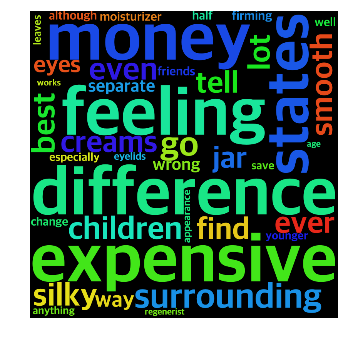

In [5]:
text = '-'.join(ds.summarize(get_b_product(beauty_list,3)['Reviews'])['mean_score_summary'])
wordcloud1 = WordCloud(font_path='/Library/Fonts/AppleSDGothicNeo-ExtraBold.otf',
                      width=800, height=800,
                      stopwords=STOPWORDS.update(["buy","use", "product", "skin", "will", "cream", "year",
                                                  "face", "good","using", "products", "really", "see", "olayX","olay", 
                                                  "price", "make", "pro", "look", "day", "years", "feel", "line",
                                                  "used", "use", "x", "much"])).generate(text)
print text
plt.imshow(wordcloud1)
plt.axis("off")

i don't find it that good.-i'm about half way through the jar and don't see a lot of difference.i do not have to use anything separate for my eyelids or skin surrounding my eyes.-i don't see much difference between the products (regenerist and pro-x), but pro-x is much more expensive.although this product leaves your face feeling very silky and smooth, i do not see any change in the appearance of my skin; especially when the product states its a &#34;firming cream&#34;?-even my children tell i look younger than my friends the same age.this is the best moisturizer i've ever used.save your money.-for the price you can't go wrong because it works just as well as the expensive creams.


(-0.5, 799.5, 799.5, -0.5)

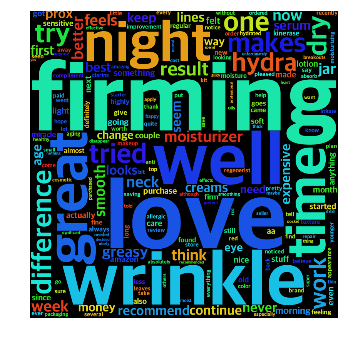

In [6]:
wordcloud1 = WordCloud(font_path='/Library/Fonts/AppleSDGothicNeo-ExtraBold.otf',
                      width=800, height=800,
                      stopwords=STOPWORDS.update(["buy","use", "product", "skin", "will", "cream", "year",
                                                  "face", "good","using", "products", "really", "see", "olayX","olay", 
                                                  "price", "make", "pro", "look", "day", "years", "feel", "line",
                                                  "used", "use", "x", "much"])).generate(get_b_product(beauty_list,3)['Reviews'])
print text
plt.imshow(wordcloud1)
plt.axis("off")

In [7]:
get_reviews(beauty_list,43)

{u'B002X7WV32': [u'Shiseido Future Solution Lx Total Regenerating Cream for Unisex, 1.7 Ounce',
  176.25],
 'Reviews': [[u'i purchased one for my mom (late 50s) and another one for myself (late 20s). besides the fact that i love my mom, i bought the product for her because i wanted to get a second opinion (i would be inclined to convince myself, "after all, it\'s expensive and is made by a reputable brand. this has got to work!!"). after 4 months of use, both my mom and i agreed that this cream is a good moisturizer at best. its ingredient list include components of moisturizer and emollient. the product\'s antioxidant stuff, such as camellia sinensis and tocopherol, go in the very last part of the ingredient list, meaning that there\'s very little of them relative to other components in the product (i actually took a class on how to read ingredient labels). in other words, i would bank in more antioxidants by eating berries and drinking a cup of green tea.  i am happy that i tried the

In [9]:
skin_type_counter(get_reviews(beauty_list,43)['Reviews'])

[0.023333873494301306, 0.0, 0.0, 0.007460317460317459]

In [10]:
#This function use sentiment to measure all the category of skin.
#However I think star rating is better.
def skin_type_counter(list_of_text):
    dry_skin = 0
    oily_skin = 0
    combination_skin = 0
    sensitivity = 0
    total_reviews = len(list_of_text)
    for review_text in list_of_text:
        new_text = review_text[0].lower()
        dry_skin += new_text.count("dry skin")*tb(new_text).sentiment.polarity
        oily_skin += new_text.count("oily skin")*tb(new_text).sentiment.polarity
        combination_skin += new_text.count("combination skin")*tb(new_text).sentiment.polarity
        sensitivity += new_text.count("sensitive")*tb(new_text).sentiment.polarity
    return [dry_skin/(total_reviews+1), oily_skin/(total_reviews+1), 
            combination_skin/(total_reviews+1), sensitivity/(total_reviews+1)]

In [98]:
#This function finds only the item review and rating
#It returns a list of dictionaries for of a beauty item

def reviews(id_list,i):
    #reviews_info = [{id_list.keys()[i]: id_list.values()[i]}]
    reviews_info = []
    beauty_item_info = {}
    
    match_list = rbf.find({"asin":{"$in": [id_list.keys()[i]]}})

    for i in match_list:
        beauty_item_info = {}
        beauty_item_info["Reviews"] = i['reviewText']
        beauty_item_info["rating"] = i['overall']
        reviews_info.append(beauty_item_info)
    
    return reviews_info


In [96]:
# This is all the category for skin type as well as possible skin problem
dry_class = ["dry skin","dryness","dry.","dry air", "be dry", 
                 "dry climate", "dry flakes", "dry and sensitive skin", "dry patches",
                 "dry patch","dry patches", "dry, sensitive skin", "my skin is very dry"]
                
oily_class = ["oily skin", "not dry out", "oiliness", "oily and sensitive skin",
                  "oily, sensitive skin", "my skin is very oily", "my skin which tends to be oily",
                  "oily/acne prone skin", "oily acne prone skin", "oily prone skin", 
                  "i tend to be really oily"]

combination_class = ["dry and oily skin", "oily and dry skin", "combination skin", "my skin is combination"
                         "combination/sensitive skin"]

sensitive_class = ["sensitive"]

Anti_aging_class = ["aging", "wrinkle"]

Acne_class = ['acne', "break out"]

Redness = ['redness', 'red spot']


In [97]:
# These line of code are for finding possible combination of words
# related to the subject you care about


# for i in xrange(15):
#     all_reviews = get_reviews(beauty_list, i)['Reviews']
#     for each_review in all_reviews:
#         sentences = nltk.sent_tokenize(each_review[0])
#         for sentence in sentences:
#             if "long"in sentence:
#                 print sentence
#                 print ""

In [65]:
#This function calculate a specific category (for example: dry skin) score
#based on user reviews
def find_category(user_review,category,rating):
    category_eval = 0
    for term in category:
        category_eval +=user_review.lower().count(term)*(rating -3) 
    return category_eval

In [103]:
#This function is the create a profile of the product based on the reviews
#The profile include: [dry_skin_score, oily_skin_score, combination_score
#                      sensitivity_score, acnes_score, anti_aging_score, redness_score]     
def product_profiler(list_of_reviews):
    dry_skin = 0
    oily_skin = 0
    combination_skin = 0
    sensitivity = 0
    acnes = 0
    aging = 0
    red_spot = 0
    total_reviews = len(list_of_reviews)+1
    for review_dict in list_of_reviews:
        review_text = review_dict['Reviews']
        rating = review_dict['rating']
        
        dry_skin += find_category(review_text,dry_class,rating)
        
        oily_skin += find_category(review_text,oily_class,rating)
        
        combination_skin += find_category(review_text,combination_class,rating)
        
        sensitivity += find_category(review_text,sensitive_class,rating)
        
        acnes += find_category(review_text,Acne_class,rating)
        
        aging += find_category(review_text, Anti_aging_class, rating)
        
        red_spot += find_category(review_text, Redness, rating) 
        
    return [total_reviews,dry_skin/(total_reviews+100), oily_skin/(total_reviews+100), 
            combination_skin/(total_reviews+100), sensitivity/(total_reviews+100),
            acnes/(total_reviews+100), aging/(total_reviews+100), red_spot/(total_reviews+100)]

###NLTK

In [17]:
stopwords = nltk.corpus.stopwords.words("english")\
            + ['usps','shipping','$','#', 'very', 'amazon','every',
                '&','order','seller','packaging','manufacture', 'ever',
                'package','cute','delivery', '.',',',"return", "might"
                '?','...','day','week', 'weeks']


In [18]:
for sentence in sentences:
    tokens = nltk.word_tokenize(sentence)
    text = [word for word in tokens if word not in stopwords]
    tagged_text = nltk.pos_tag(text)
    for word, tag in tagged_text:
        words.append({"word": word, "pos": tag})

In [19]:
from nltk.stem.wordnet import WordNetLemmatizer

In [20]:
words

[{u'pos': 'NN', u'word': u'worth'},
 {u'pos': 'NN', u'word': u'price'},
 {u'pos': 'NN', u'word': u'eradicate'},
 {u'pos': 'NN', u'word': u'keratosis'},
 {u'pos': 'NNS', u'word': u'pilaris'},
 {u'pos': 'RB', u'word': u"n't"},
 {u'pos': 'NN', u'word': u'aware'},
 {u'pos': 'RB', u'word': u'little'},
 {u'pos': 'NNS', u'word': u'bumps'},
 {u'pos': 'NN', u'word': u'get'},
 {u'pos': 'NN', u'word': u'skin'},
 {u'pos': 'RB', u'word': u'often'},
 {u'pos': 'VBD', u'word': u'referred'},
 {u'pos': '``', u'word': u'``'},
 {u'pos': 'NN', u'word': u'chicken'},
 {u'pos': 'NN', u'word': u'skin'},
 {u'pos': "''", u'word': u"''"},
 {u'pos': 'NN', u'word': u'way'},
 {u'pos': 'NNS', u'word': u'looks'},
 {u'pos': 'NNS', u'word': u'feels'},
 {u'pos': 'NN', u'word': u'condition'},
 {u'pos': 'JJ', u'word': u'vary'},
 {u'pos': 'NN', u'word': u'severity'},
 {u'pos': 'NNS', u'word': u'bumps'},
 {u'pos': 'VBD', u'word': u'red'},
 {u'pos': 'IN', u'word': u'like'},
 {u'pos': 'NN', u'word': u'acne'},
 {u'pos': 'IN', u

In [21]:
nouns = []
lem = WordNetLemmatizer()
noun_only = [noun for noun in words if noun["pos"] in ["NN", "NNS"]]
for noun_word in noun_only:
    nouns.append(lem.lemmatize(noun_word["word"]))
    

In [22]:
import logging
import gensim
from gensim import corpora
from gensim.corpora import BleiCorpus